[13, 12, 29, 29, 28]


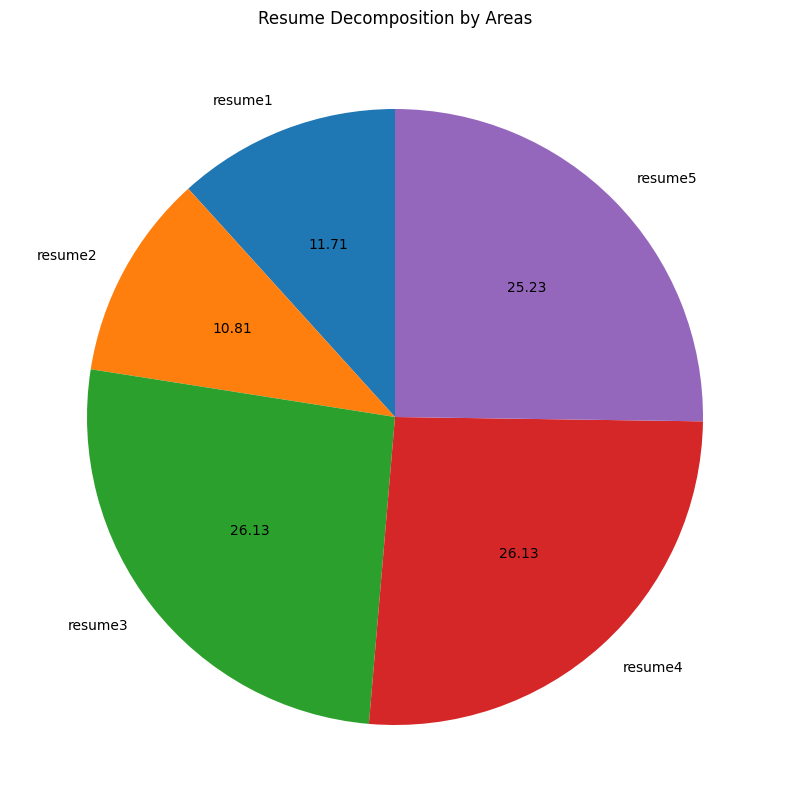

In [ ]:
# Import required libraries
!pip install pyPDF2
import PyPDF2
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

array=[]

for i in range(1,6):
  # Open pdf file
  pdfFileObj = open('/content/resume'+str(i)+'.pdf','rb')

  # Read file
  pdfReader = PyPDF2.PdfReader(pdfFileObj)

  # Get the number of pages using the len() function
  num_pages = len(pdfReader.pages)
  # Initialize a count for the number of pages
  count = 0

  # Initialize a text empty etring variable
  text = ""

  # Extract text from every page on the file
  while count < num_pages:
      pageObj = pdfReader.pages[count]
      count +=1
      text += pageObj.extract_text()
  # Convert all strings to lowercase
  text = text.lower()

  # Remove numbers
  text = re.sub(r'\d+','',text)

  # Remove punctuation
  text = text.translate(str.maketrans('','',string.punctuation))
  terms =['black belt','capability analysis','control charts','doe','dmaic','fishbone','gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
          'pdsa','performance improvement','process improvement','quality','quality circles','quality tools','root cause','six sigma','stability analysis','statistical analysis','tqm','automation','bottleneck','constraints','cycle time','efficiency','fmea','machinery','maintenance','manufacture','line balancing','oee','operations',
          'operations research','optimization','overall equipment effectiveness',
          'pfmea','process','process mapping','production','resources','safety',
          'stoppage','value stream mapping','utilization','abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
          'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
          'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
          'third party logistics','transport','transportation','traffic','supply chain',
          'vendor','warehouse','wip','work in progress','administration','agile','budget','cost','direction','feasibility analysis',
          'finance','kanban','leader','leadership','management','milestones','planning',
          'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders','analytics','api','aws','big data','busines intelligence','clustering','code',
          'coding','data','database','data mining','data science','deep learning','hadoop',
          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
          'predictive','programming','python','r','sql','tableau','text mining',
          'visualuzation','adverse events','care','clinic','cphq','ergonomics','healthcare',
          'health care','health','hospital','human factors','medical','near misses',
          'patient','reporting system',"Programming Languages", "Python", "Java", "C++", "JavaScript", "Ruby", "Swift", "PHP", "C#", "Go", "Rust", "Kotlin", "TypeScript", "HTML", "CSS",
    "Software Development", "Agile", "Scrum", "DevOps", "SDLC", "Continuous Integration", "Continuous Deployment", "Microservices", "Containerization", "Serverless", "CI/CD", "TDD", "BDD", "Refactoring",
    "Version Control", "Git", "SVN", "Mercurial", "GitHub", "Bitbucket", "GitLab", "Versioning", "Branching", "GitFlow", "Pull Requests", "Code Review",
    "Web Development", "Frontend Development", "Backend Development", "Full Stack Development", "Responsive Design", "Single Page Applications", "RESTful APIs", "GraphQL", "WebSockets", "AJAX", "MVC", "MVVM", "SPA",
    "Database Management", "SQL", "NoSQL", "MySQL", "PostgreSQL", "MongoDB", "SQLite", "Redis", "Database Design", "Normalization", "Indexing", "Transactions", "ACID",
    "Testing", "Unit Testing", "Integration Testing", "End-to-End Testing", "Test Automation", "Selenium", "Junit", "Pytest", "Mocha", "Chai", "JUnit", "Mockito", "Cypress",
    "Algorithms and Data Structures", "Search Algorithms", "Sorting Algorithms", "Graph Algorithms", "Dynamic Programming", "Data Structures", "Arrays", "Linked Lists", "Stacks", "Queues", "Trees", "Graphs", "Hash Tables",
    "Object-Oriented Design", "Design Patterns", "SOLID Principles", "Inheritance", "Polymorphism", "Encapsulation", "Abstraction", "Factory Pattern", "Singleton Pattern", "Observer Pattern", "Adapter Pattern", "Strategy Pattern",
    "Frameworks and Libraries", "Django", "Flask", "Spring", "Node.js", "React", "Angular", "Vue.js", "Express", "ASP.NET", "Ruby on Rails", "Laravel", "Symfony",
    "Debugging", "Logging", "Breakpoints", "Debuggers", "Console Output", "Error Handling", "Exception Handling", "Stack Traces", "Debugging Tools", "Chrome DevTools", "Visual Studio Debugger", "PyCharm Debugger",
    "Circuit Design", "PCB Design", "Analog Electronics", "Digital Electronics", "Embedded Systems", "FPGA Programming", "Microcontroller Programming", "HDL", "Verilog", "VHDL", "Signal Processing", "Semiconductor Physics", "ECAD Tools",
    "Network Protocols", "TCP/IP", "UDP", "HTTP", "FTP", "DNS", "DHCP", "SMTP", "SSL/TLS", "SSH", "SNMP", "IPv4", "IPv6", "BGP", "OSPF",
    "Network Security", "Firewalls", "VPN", "Intrusion Detection Systems", "Encryption", "PKI", "Public Key Infrastructure", "Cryptography", "Penetration Testing", "Security Audits", "Vulnerability Assessment", "Security Policies", "Security Standards",
    "Routing and Switching", "Routing Protocols", "Switching", "VLANs", "STP", "VRRP", "HSRP", "OSPF", "BGP", "EIGRP", "RIP", "Static Routing", "Dynamic Routing", "IPv4 Addressing", "IPv6 Addressing",
    "Cloud Computing", "AWS", "Amazon Web Services", "Microsoft Azure", "Google Cloud Platform", "Cloud Storage", "Cloud Networking", "Serverless Computing", "Containers", "Kubernetes", "Docker", "Infrastructure as Code", "IaaS", "PaaS", "SaaS",
    "Software-Defined Networking", "SDN", "OpenFlow", "Network Virtualization", "Virtual LANs", "Software-Defined WAN", "SD-WAN", "SD-LAN", "Network Automation", "Network Orchestration", "SDN Controllers", "Network Programmability", "REST APIs", "NETCONF", "YANG",
    "Project Management", "Agile Methodologies", "Scrum", "Kanban", "Waterfall Model", "Project Planning", "Resource Management", "Time Management", "Budget Management", "Risk Management", "Stakeholder Management", "Communication Skills", "Leadership", "Team Building",
    "Communication Skills", "Written Communication", "Verbal Communication", "Presentation Skills", "Active Listening", "Interpersonal Skills", "Conflict Resolution", "Negotiation Skills", "Empathy", "Feedback Skills", "Cross-Cultural Communication", "Emotional Intelligence", "Public Speaking",
    "Problem-Solving", "Analytical Thinking", "Creativity", "Critical Thinking", "Decision Making", "Innovative Thinking", "Systems Thinking", "Root Cause Analysis", "Troubleshooting", "Logical Reasoning", "Adaptability", "Resilience", "Time Management", "Attention to Detail",
    "Leadership", "Visionary Leadership", "Transformational Leadership", "Servant Leadership", "Strategic Thinking", "Decision Making", "Delegation", "Motivation", "Team Building", "Coaching", "Mentoring", "Conflict Management", "Performance Management", "Change Management",
    "Empathy", "Empathetic Listening", "Understanding Others", "Supportiveness", "Compassion", "Building Relationships", "Cultural Sensitivity", "Emotional Intelligence", "Teamwork", "Collaboration", "Trustworthiness", "Resilience", "Positive Attitude", "Self-Awareness",
    "Technical Writing", "Documentation", "User Manuals", "API Documentation", "Code Documentation", "Technical Reports", "Blogs", "Articles", "Whitepapers", "Knowledge Base", "Proofreading", "Editing", "Research", "Information Synthesis"

]


  # Initializie score counters for each area
  quality = 0
  operations = 0
  supplychain = 0
  project = 0
  data = 0
  healthcare = 0

  # Create an empty list where the scores will be stored
  scores = 0
  for word in terms:
    if word.lower() in text:
      scores+=1


  array.append(scores)
  #pie.savefig('resume_screening_results'+str(i)+'.png')

skills = []
for i in range(1,1+len(array)):
  skills.append("resume"+str(i))

print(array)

pie = plt.figure(figsize=(10,10))
# plt.pie(['score'], labels=summary.index, explode = (0,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.pie(array,labels= skills,autopct='%.2f',startangle=90)
plt.title('Resume Decomposition by Areas')

# plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')
